In [1]:
import pvlib
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pytz

In [2]:
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# DATA ANALYSIS

### Monthly average data for Abu Dhabi

In [3]:
#Reading the local TMY file
tmy_ad=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\AD_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_ad.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_ad = tmy_ad.resample('M').mean()
#Add cloudiness
monthly_average_ad['cloud']=monthly_average_ad['Gd(h)']/monthly_average_ad['G(h)']
#Add cell temperature
monthly_average_ad['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_ad['G(h)'], temp_air=monthly_average_ad['T2m'], wind_speed=monthly_average_ad['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#print(monthly_average_ad)
#Add irradiance
monthly_average_ad['Glob_irr']=  monthly_average_ad['G(h)']
#print(monthly_average_ad)

### Monthly average for Melbourne

In [4]:
#Reading the local TMY file
tmy_mel=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mel_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_mel.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_mel = tmy_mel.resample('M').mean()
#Add cloudiness
monthly_average_mel['cloud']=monthly_average_mel['Gd(h)']/monthly_average_mel['G(h)']
#Add cell temperature
monthly_average_mel['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_mel['G(h)'], temp_air=monthly_average_mel['T2m'], wind_speed=monthly_average_mel['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_mel['Glob_irr']=  monthly_average_mel['G(h)']
#print(monthly_average_mel)

### Monthly average data for Shannan

In [5]:
#Reading the local TMY file
tmy_shan=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Shannan_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_shan.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_shan = tmy_shan.resample('M').mean()
#Add cloudiness
monthly_average_shan['cloud']=monthly_average_shan['Gd(h)']/monthly_average_shan['G(h)']
#Add cell temperature
monthly_average_shan['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_shan['G(h)'], temp_air=monthly_average_shan['T2m'], wind_speed=monthly_average_shan['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_shan['Glob_irr']=  monthly_average_shan['G(h)']
#print(monthly_average_shan)

### Monthly average data for Santiago

In [6]:
#Reading the local TMY file
tmy_sant=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Sant_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_sant.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_sant = tmy_sant.resample('M').mean()
#Add cloudiness
monthly_average_sant['cloud']=monthly_average_sant['Gd(h)']/monthly_average_sant['G(h)']
#Add cell temperature
monthly_average_sant['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_sant['G(h)'], temp_air=monthly_average_sant['T2m'], wind_speed=monthly_average_sant['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_sant['Glob_irr']=  monthly_average_sant['G(h)']
#print(monthly_average_sant)

### Monthly average data for Montreal

In [7]:
#Reading the local TMY file
tmy_mont=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mont_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_mont.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_mont = tmy_mont.resample('M').mean()
#Add cloudiness
monthly_average_mont['cloud']=monthly_average_mont['Gd(h)']/monthly_average_mont['G(h)']
#Add cell temperature
monthly_average_mont['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_mont['G(h)'], temp_air=monthly_average_mont['T2m'], wind_speed=monthly_average_mont['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_mont['Glob_irr']=  monthly_average_mont['G(h)']
#print(monthly_average_mont)

### Monthly average data for Nairobi

In [8]:
#Reading the local TMY file
tmy_nairobi=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Nairobi_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_nairobi.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_nairobi = tmy_nairobi.resample('M').mean()
#Add cloudiness
monthly_average_nairobi['cloud']=monthly_average_nairobi['Gd(h)']/monthly_average_nairobi['G(h)']
#Add cell temperature
monthly_average_nairobi['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_nairobi['G(h)'], temp_air=monthly_average_nairobi['T2m'], wind_speed=monthly_average_nairobi['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_nairobi['Glob_irr']=  monthly_average_nairobi['G(h)']
#print(monthly_average_nairobi)

### Comparing Monthly Average Global Irradiance

In [9]:
Ad_irr = monthly_average_ad['Glob_irr']
Mel_irr = monthly_average_mel['Glob_irr']
Shan_irr = monthly_average_shan['Glob_irr']
Sant_irr = monthly_average_sant['Glob_irr']
Mont_irr = monthly_average_mont['Glob_irr']
Nairobi_irr = monthly_average_nairobi['Glob_irr']

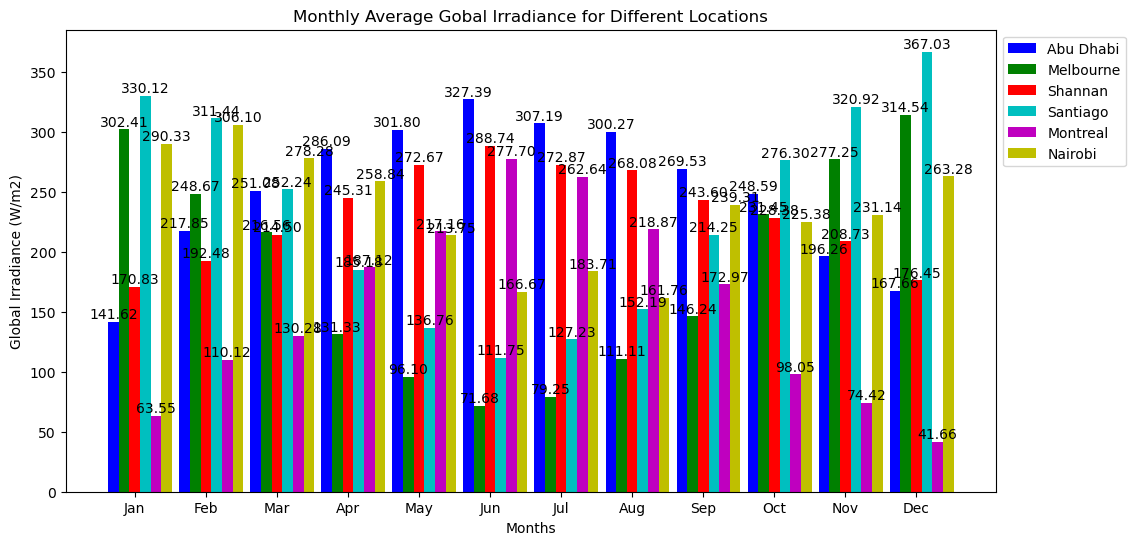

In [10]:
#plotting average global irradiance

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_irr, width=bar_width, label='Abu Dhabi', color='b')
plt.bar(bar_positions - bar_width, Mel_irr, width=bar_width, label='Melbourne', color='g')
plt.bar(bar_positions, Shan_irr, width=bar_width, label='Shannan', color='r')
plt.bar(bar_positions + bar_width, Sant_irr, width=bar_width, label='Santiago', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_irr, width=bar_width, label='Montreal', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_irr, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_irr):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_irr):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_irr):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_irr):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_irr):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_irr):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Global Irradiance (W/m2)')
plt.title('Monthly Average Gobal Irradiance for Different Locations')
plt.xticks(bar_positions, months)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Comparing Monthly average wind speed

In [11]:
Ad_wind = monthly_average_ad['WS10m']
Mel_wind = monthly_average_mel['WS10m']
Shan_wind = monthly_average_shan['WS10m']
Sant_wind = monthly_average_sant['WS10m']
Mont_wind = monthly_average_mont['WS10m']
Nairobi_wind = monthly_average_nairobi['WS10m']

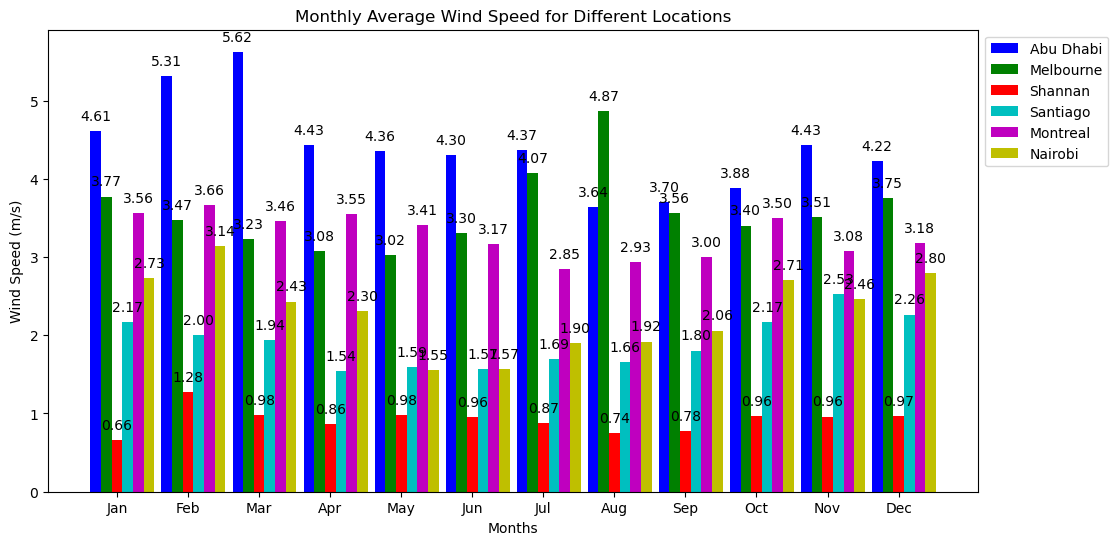

In [12]:
#plotting average wind speed

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_wind, width=bar_width, label='Abu Dhabi', color='b')
plt.bar(bar_positions - bar_width, Mel_wind, width=bar_width, label='Melbourne', color='g')
plt.bar(bar_positions, Shan_wind, width=bar_width, label='Shannan', color='r')
plt.bar(bar_positions + bar_width, Sant_wind, width=bar_width, label='Santiago', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_wind, width=bar_width, label='Montreal', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_wind, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_wind):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_wind):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_wind):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_wind):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_wind):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_wind):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Average Wind Speed for Different Locations')
plt.xticks(bar_positions, months)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Comparing monthly average cloudiness

In [13]:
Ad_cloud = monthly_average_ad['cloud']
Mel_cloud = monthly_average_mel['cloud']
Shan_cloud = monthly_average_shan['cloud']
Sant_cloud = monthly_average_sant['cloud']
Mont_cloud = monthly_average_mont['cloud']
Nairobi_cloud = monthly_average_nairobi['cloud']

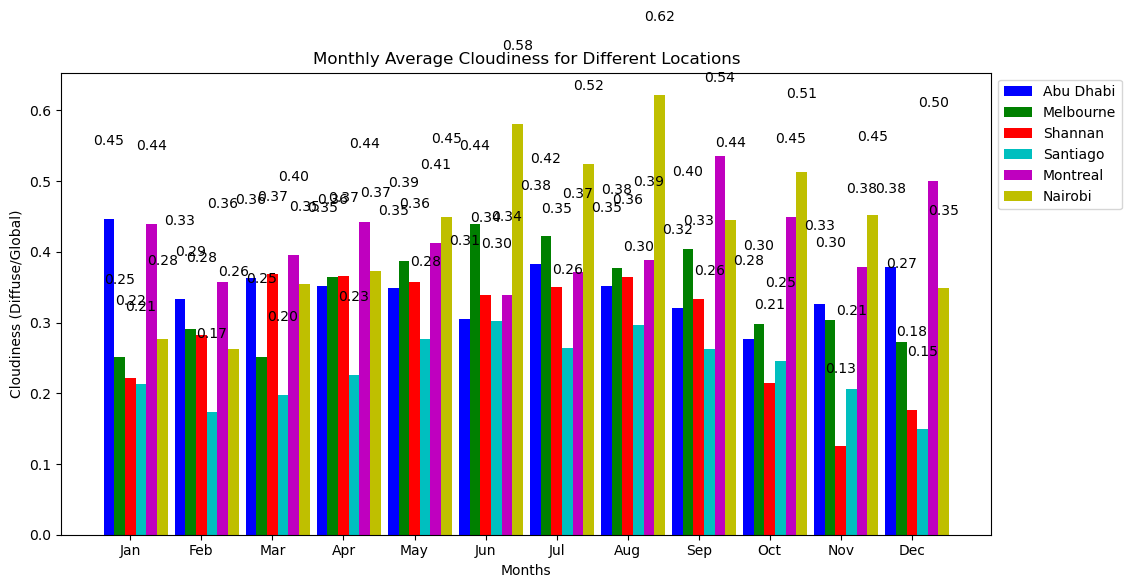

In [14]:
#plotting average cloudiness

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_cloud, width=bar_width, label='Abu Dhabi', color='b')
plt.bar(bar_positions - bar_width, Mel_cloud, width=bar_width, label='Melbourne', color='g')
plt.bar(bar_positions, Shan_cloud, width=bar_width, label='Shannan', color='r')
plt.bar(bar_positions + bar_width, Sant_cloud, width=bar_width, label='Santiago', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_cloud, width=bar_width, label='Montreal', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_cloud, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_cloud):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_cloud):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_cloud):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_cloud):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_cloud):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_cloud):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Cloudiness (Diffuse/Global)')
plt.title('Monthly Average Cloudiness for Different Locations')
plt.xticks(bar_positions, months)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Comparing montly average cell temperature

In [15]:
Ad_cell = monthly_average_ad['cell_temp']
Mel_cell = monthly_average_mel['cell_temp']
Shan_cell = monthly_average_shan['cell_temp']
Sant_cell = monthly_average_sant['cell_temp']
Mont_cell = monthly_average_mont['cell_temp']
Nairobi_cell = monthly_average_nairobi['cell_temp']

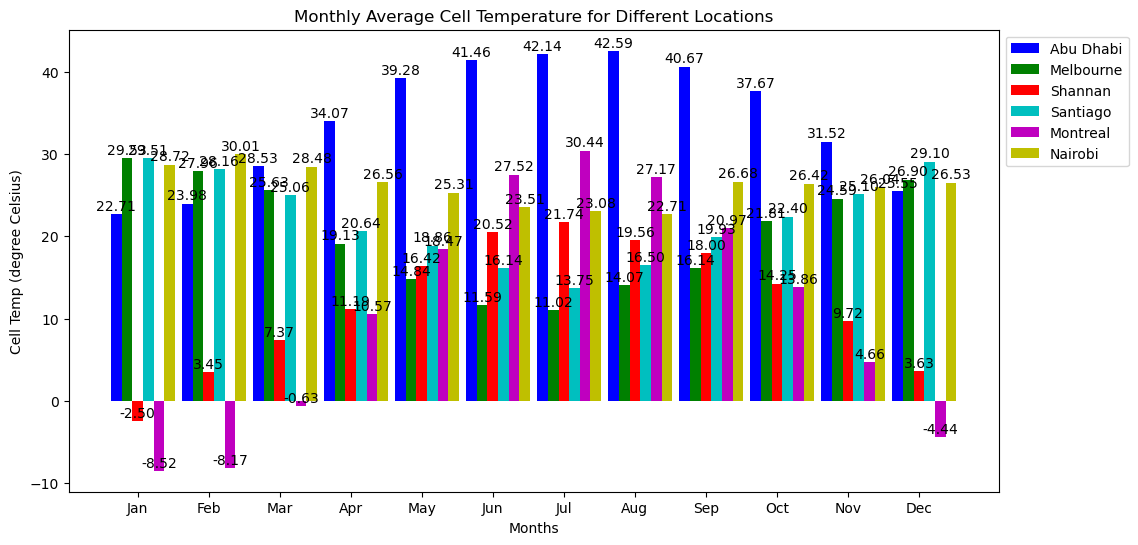

In [16]:
#plotting average cloudiness

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_cell, width=bar_width, label='Abu Dhabi', color='b')
plt.bar(bar_positions - bar_width, Mel_cell, width=bar_width, label='Melbourne', color='g')
plt.bar(bar_positions, Shan_cell, width=bar_width, label='Shannan', color='r')
plt.bar(bar_positions + bar_width, Sant_cell, width=bar_width, label='Santiago', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_cell, width=bar_width, label='Montreal', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_cell, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_cell):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_cell):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_cell):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_cell):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_cell):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_cell):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Cell Temp (degree Celsius)')
plt.title('Monthly Average Cell Temperature for Different Locations')
plt.xticks(bar_positions, months)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# COMPUTATION OF OPTIMAL TILT ANGLE

### Loading location data

In [17]:
#Defining a list to hold multiple lists, each corresponding to the tilt angle and global irradiance of each city 
final_list=[]

#Defining an array to hold the local location of the TMY files for different cities
Cities=['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
Timezones=['Asia/Dubai','Australia/Melbourne','Asia/Shanghai','America/Santiago','America/Montreal','Africa/Nairobi']
Coordinates=[[24.454,54.377],[-37.812,144.948],[29.240, 91.771], [-31.761, -71.319], [45.551, -73.602], [-1.303, 36.826]]
Cities_file=['G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\AD_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mel_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Shannan_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Sant_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mont_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Nairobi_data.csv'
            ]

#Defining solar module used in the project
sandia_modules=pvlib.pvsystem.retrieve_sam('SandiaMod')
Module=sandia_modules['SolarWorld_Sunmodule_250_Poly__2013_']

#Setting output display constraints
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

#Storing yearly average DC power for every city
DC_Power=[]

### APPROACH II: Calculating optimal annual fixed tilt based on average global irradiance

In [18]:
#Defining a list to hold multiple lists, each corresponding to the tilt angle and global irradiance of each city 
final_list=[]
#Storing the optimal tilt angles for every city
best_tilts=[]
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2021-01-01 00:00", end="2021-12-31 23:00",freq="h")
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    #Obtaining Zenith, Elevation and Azimuth
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,5)
    irradiance_tilt =[]
    tilt_angle = []
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )

        #Finding mean global irradiance
        avg_global_irrad = total_irrad.poa_global.mean()
        tilt_angle.append(pitch)
        irradiance_tilt.append(avg_global_irrad)
    maximum_avg_global_irradiance=max(irradiance_tilt)
    index = irradiance_tilt.index(maximum_avg_global_irradiance)
    optimum_tilt=tilt_angle[index]
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt, "degrees")
    best_tilts.append(optimum_tilt)
    final_relation=list(zip(tilt_angle,irradiance_tilt))
    final_list.append(final_relation)
    
#print(best_tilts)

Optimum tilt angle for Abu Dhabi is 20 degrees
Optimum tilt angle for Melbourne is 30 degrees
Optimum tilt angle for Shannan is 30 degrees
Optimum tilt angle for Santiago is 25 degrees
Optimum tilt angle for Montreal is 35 degrees
Optimum tilt angle for Nairobi is 0 degrees


#### Plotting the variation of average annual global irradiance with tilt

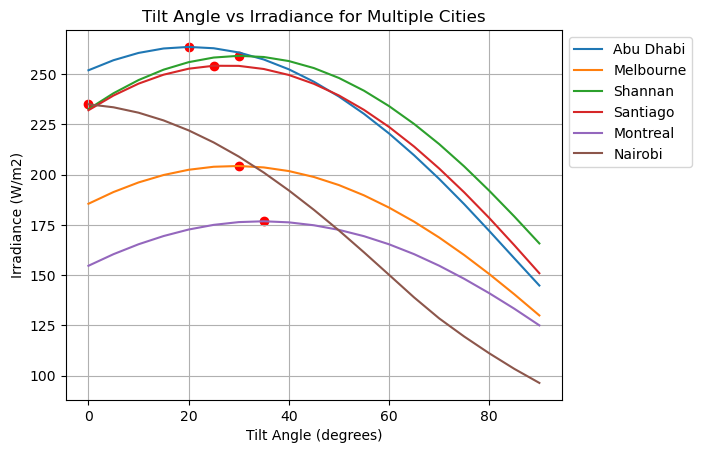

In [27]:
fig, ax = plt.subplots()

for i, city_data in enumerate(final_list):
    tilt_angles, irradiance_values = zip(*city_data)
    city = Cities[i]
    ax.plot(tilt_angles, irradiance_values, label=f'{city}')
    optimal_tilt_angle = best_tilts[i]
    max_irradiance = max(irradiance_values)
    ax.scatter(optimal_tilt_angle, max_irradiance, marker='o', color='red')
ax.set_xlabel('Tilt Angle (degrees)')
ax.set_ylabel('Irradiance (W/m2)')
ax.set_title('Tilt Angle vs Irradiance for Multiple Cities')
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Computing DC power at this fixed tilt throughout the year

In [25]:
#to store the average DC power for every city
avg_DC_Power_irr=[]   
avg_global_irr=[]
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    #Reading the TMY file of every city under consideration
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")

    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    
    #Condition to fix the orientation of the panel based on the location of the city
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
        
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values


    #Getting fixed tilt angle from the previous results
    pitch=best_tilts[i]
    
    #Temporary variables
    tilt_angle=[]
    
    total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad.poa_direct
    diffuse=total_irrad.poa_diffuse
    globalirr=total_irrad.poa_global
    # Calculating DC output power
    dc_power=globalirr*250/1000
        
    #Finding mean DC Power
    avg_DC_power = dc_power.mean()
    avg_globalirr=globalirr.mean()*0.156*0.156*60
    #avg_globalirr=globalirr.mean()
    avg_DC_Power_irr.append(avg_DC_power)
    avg_global_irr.append(avg_globalirr)

#### Plotting average DC power for different cities considering global irradiance

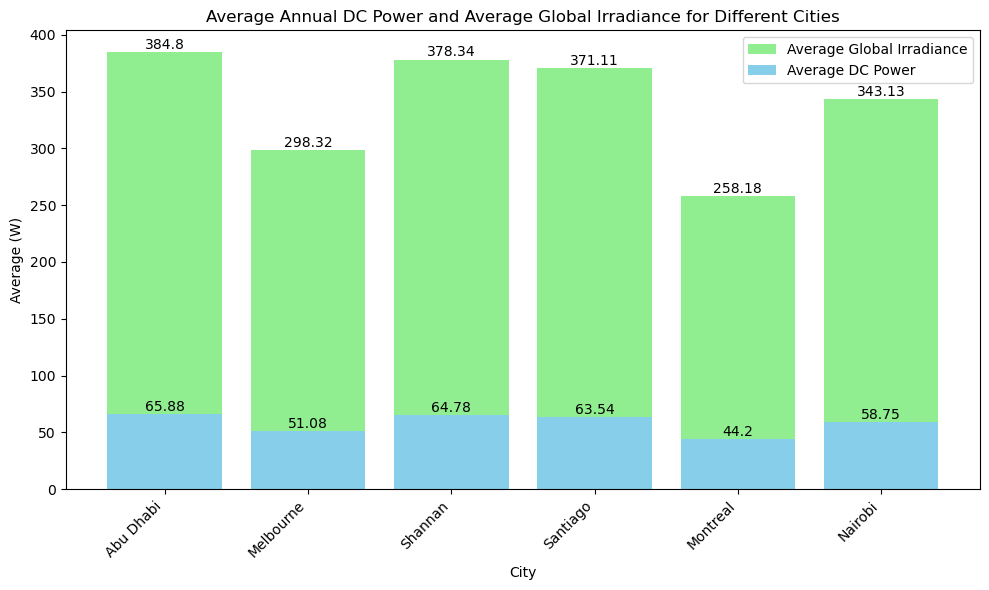

In [26]:
plt.figure(figsize=(10, 6))
cities = ['Abu Dhabi', 'Melbourne', 'Shannan', 'Santiago', 'Montreal', 'Nairobi']
# Plotting average global irradiance
bars2 = plt.bar(cities, avg_global_irr, color='lightgreen', label='Average Global Irradiance')
for bar, irradiance in zip(bars2, avg_global_irr):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(irradiance, 2)), ha='center', va='bottom')
# Plotting average DC Power
bars1 = plt.bar(cities, avg_DC_Power_irr, color='skyblue', label='Average DC Power')
for bar, power in zip(bars1, avg_DC_Power_irr):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')
plt.xlabel('City')
plt.ylabel('Average (W)')
plt.title('Average Annual DC Power and Average Global Irradiance for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### APPROACH III: Computing annual fixed tilt based on average DC power output from the panel considering wind and temperature effects

Optimum tilt angle for Abu Dhabi is 20 degrees
Optimum tilt angle for Melbourne is 30 degrees
Optimum tilt angle for Shannan is 30 degrees
Optimum tilt angle for Santiago is 28 degrees
Optimum tilt angle for Montreal is 36 degrees
Optimum tilt angle for Nairobi is 0 degrees


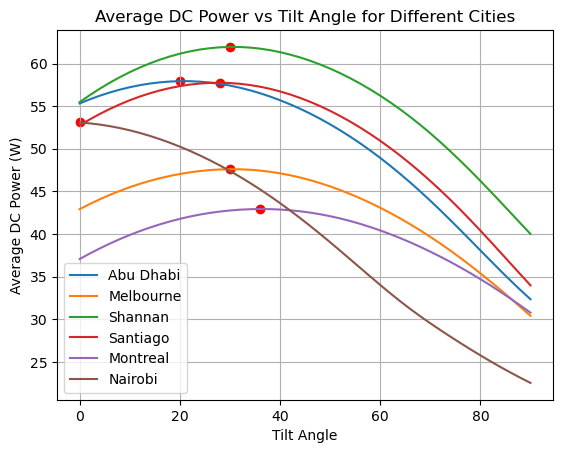

In [105]:
Avg_DC_Power=[] #Stores the average DC Power at optimal tilt for different cities
Best_tilt_DC=[]
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    #Reading the TMY file of every city under consideration
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")

    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    
    #Condition to fix the orientation of the panel based on the location of the city
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
        
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    #print(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_DC_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    Best_tilt_DC.append(optimum_tilt)
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt, "degrees")
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting average DC power for different cities considering temperature and wind

<Figure size 1000x600 with 0 Axes>

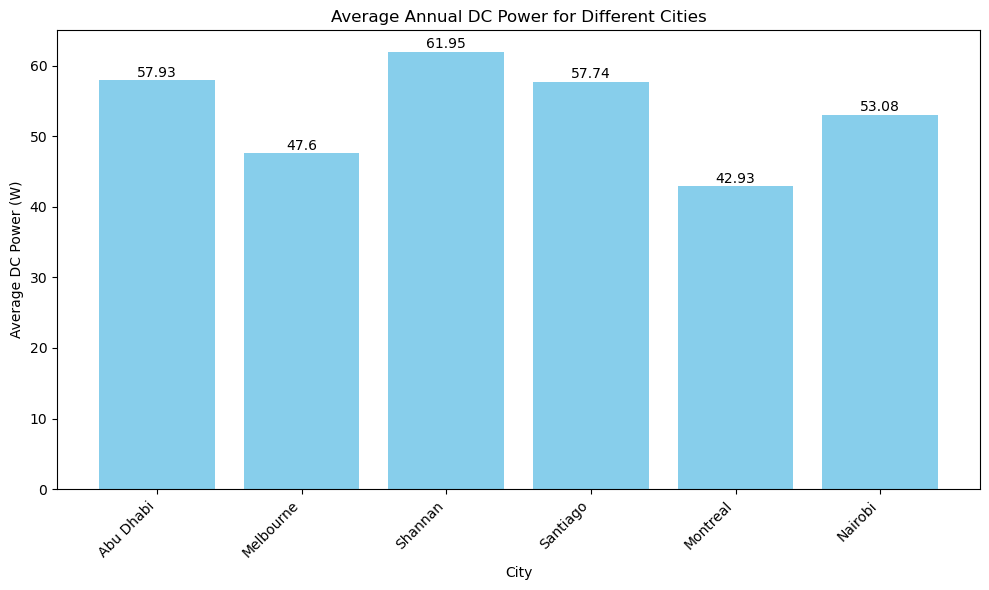

In [23]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_DC_Power, color='skyblue')
for bar, power in zip(bars, Avg_DC_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### APPROACH IV: Computing fixed tilt angle considering seasonality

#### SUMMER SEASON

Optimum tilt angle for Abu Dhabi is 10 degrees
Optimum tilt angle for Melbourne is 16 degrees
Optimum tilt angle for Shannan is 12 degrees
Optimum tilt angle for Santiago is 14 degrees
Optimum tilt angle for Montreal is 28 degrees
Optimum tilt angle for Nairobi is 0 degrees


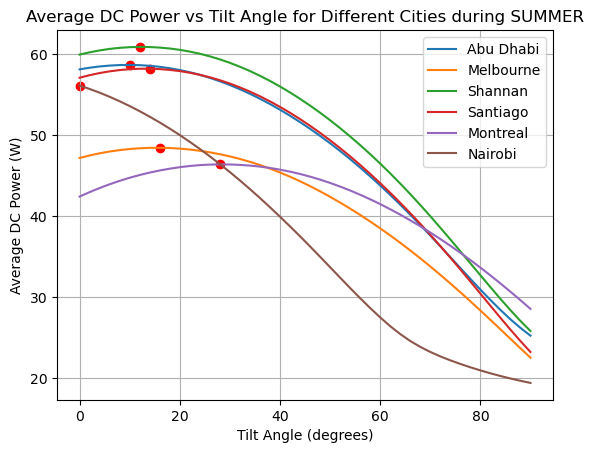

In [103]:
#Northern Hemisphere: May, June, July, August, September, October
#Southern Hemisphere: November, December, January, February, March, April
Avg_Summer_Power=[]
Best_tilt_summer=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x=pd.date_range(start="2007-05-01 00:00", end="2007-10-31 23:00",freq="h")
        Surface_azi=180
        a=4416
    else:
        x= pd.date_range(start="2007-11-01 00:00", end="2007-12-31 23:00", freq="h")
        # Extend the date range for November to April
        x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        x = x.append(x_extended)
        Surface_azi=0
        a=4344
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=a, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_Summer_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    Best_tilt_summer.append(optimum_tilt)
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt, "degrees")
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle (degrees)')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities during SUMMER')
plt.legend()
plt.grid(True)
plt.show()
    

#### Plot of average DC power during summer for different cities 

<Figure size 1000x600 with 0 Axes>

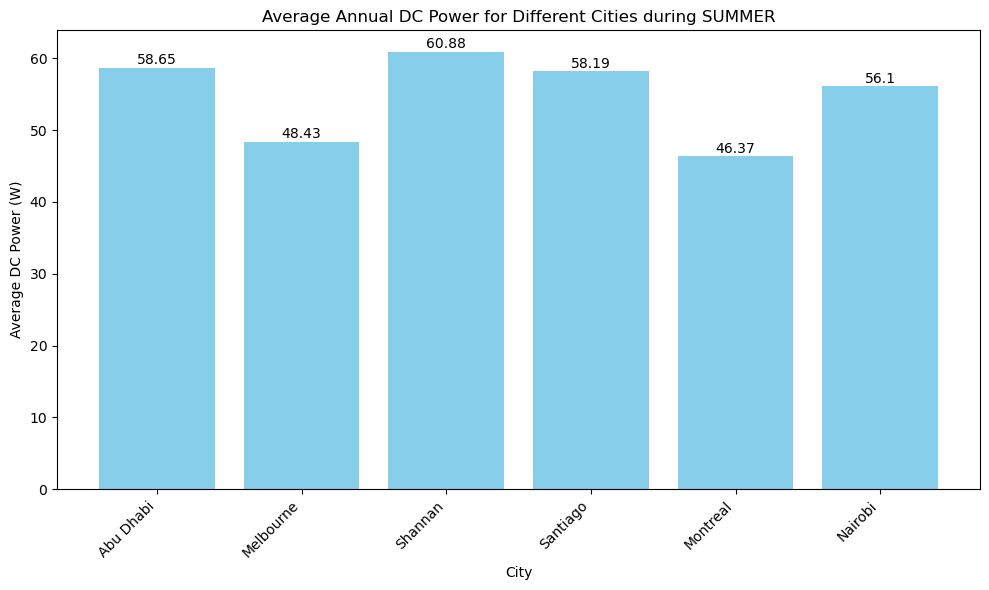

In [89]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_Summer_Power, color='skyblue')
for bar, power in zip(bars, Avg_Summer_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities during SUMMER')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### WINTER SEASON

Optimum tilt angle for Abu Dhabi is 34 degrees
Optimum tilt angle for Melbourne is 54 degrees
Optimum tilt angle for Shannan is 42 degrees
Optimum tilt angle for Santiago is 50 degrees
Optimum tilt angle for Montreal is 52 degrees
Optimum tilt angle for Nairobi is 20 degrees


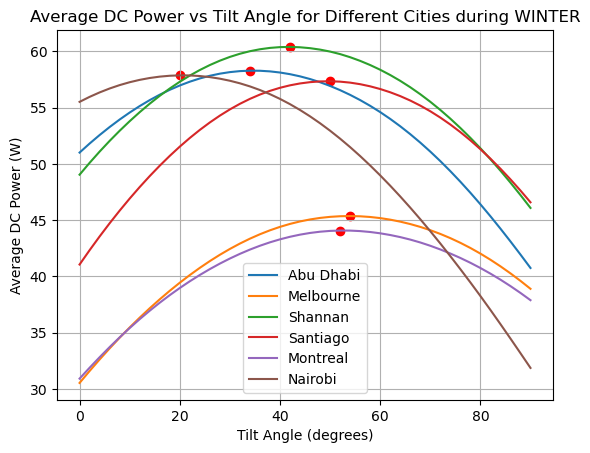

In [104]:
#Northern Hemisphere: November, December, January, February, March, April
#Southern Hemisphere: May, June, July, August, September, October 
Avg_Winter_Power=[]
Best_tilt_winter=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x= pd.date_range(start="2007-11-01 00:00", end="2007-12-31 23:00", freq="h")
        # Extend the date range for November to April
        x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        x = x.append(x_extended)
        Surface_azi=180
        a=4344
    else:
        x=pd.date_range(start="2007-05-01 00:00", end="2007-10-31 23:00",freq="h")
        Surface_azi=0
        a=4416
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=a, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_Winter_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    Best_tilt_winter.append(optimum_tilt)
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt, "degrees")
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle (degrees)')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities during WINTER')
plt.legend()
plt.grid(True)
plt.show()
    

#### Plot of average DC power during winter for different cities 

<Figure size 1000x600 with 0 Axes>

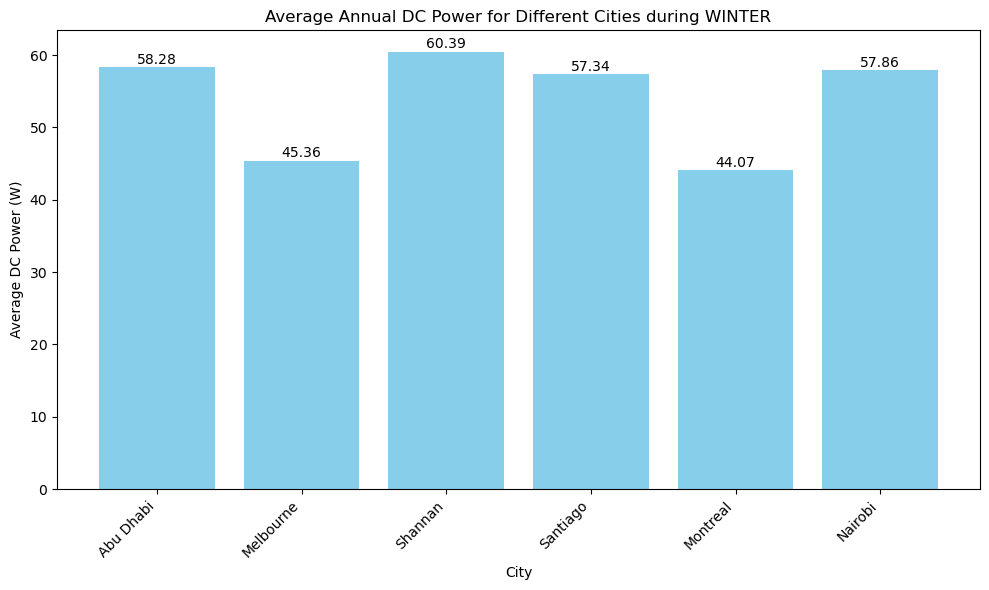

In [88]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_Winter_Power, color='skyblue')
for bar, power in zip(bars, Avg_Winter_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities during WINTER')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

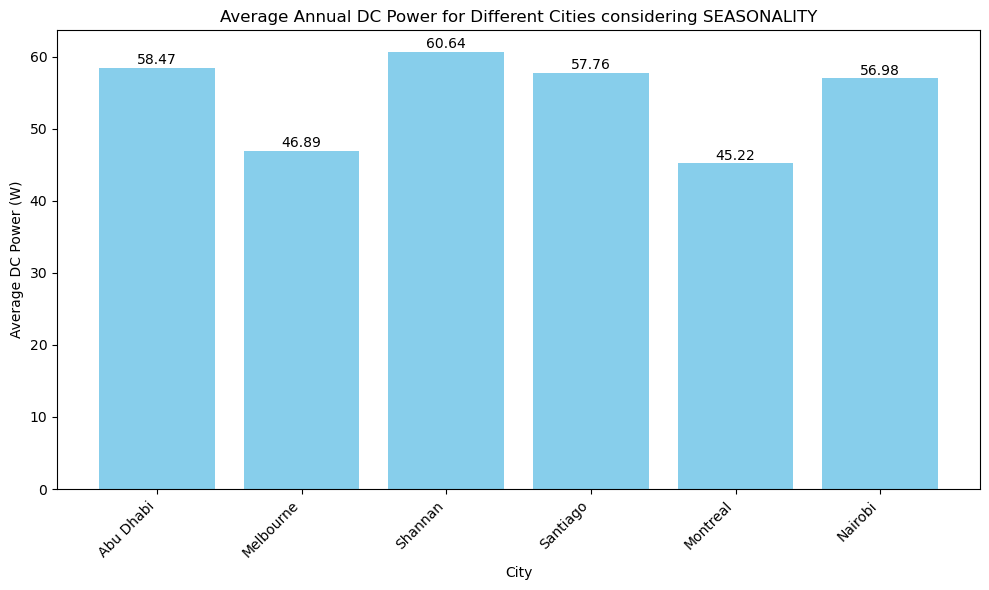

In [90]:
Average=[]
for i in range(len(Avg_Winter_Power)):
    Average. append((Avg_Winter_Power[i]+Avg_Summer_Power[i])/2)
    
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Average, color='skyblue')
for bar, power in zip(bars, Average):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities considering SEASONALITY')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()    
    

## RESULT ANALYSIS

### Comparison of Average DC output power

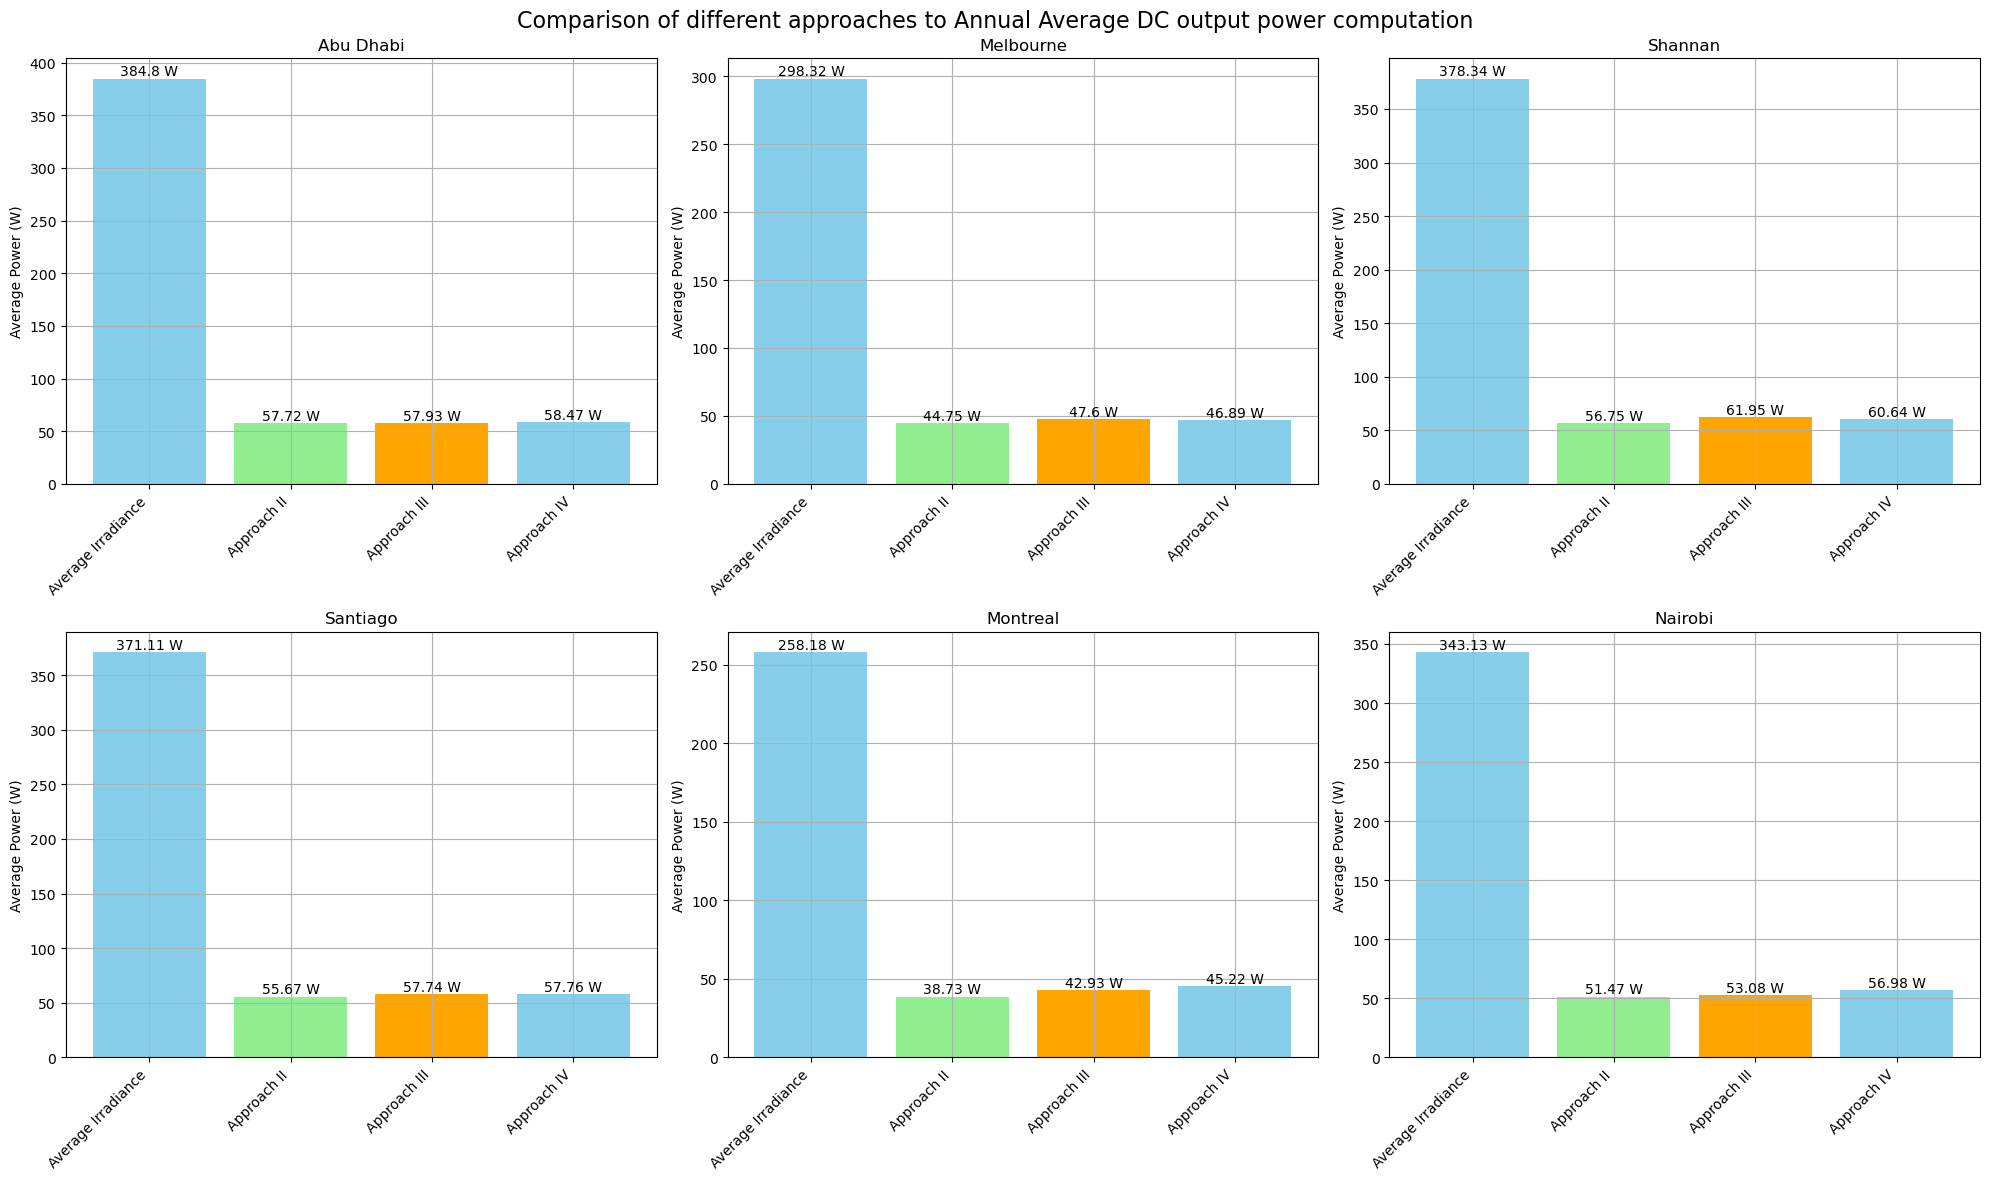

In [102]:
plt.figure(figsize=(20, 12))
plt.suptitle('Comparison of different approaches to Annual Average DC output power computation', fontsize=16)
for idx, city in enumerate(cities, start=1):
    plt.subplot(2, 3, idx)
    bars = plt.bar(['Average Irradiance', 'Approach II', 'Approach III', 'Approach IV'], 
                   [avg_global_irr[idx-1], avg_DC_Power_irr[idx-1], Avg_DC_Power[idx-1],Average[idx-1]], 
                   color=['skyblue', 'lightgreen', 'orange'])
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 f'{round(bar.get_height(), 2)} W', ha='center', va='bottom')
    plt.title(city)
    plt.ylabel('Average Power (W)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

plt.tight_layout()
plt.show()


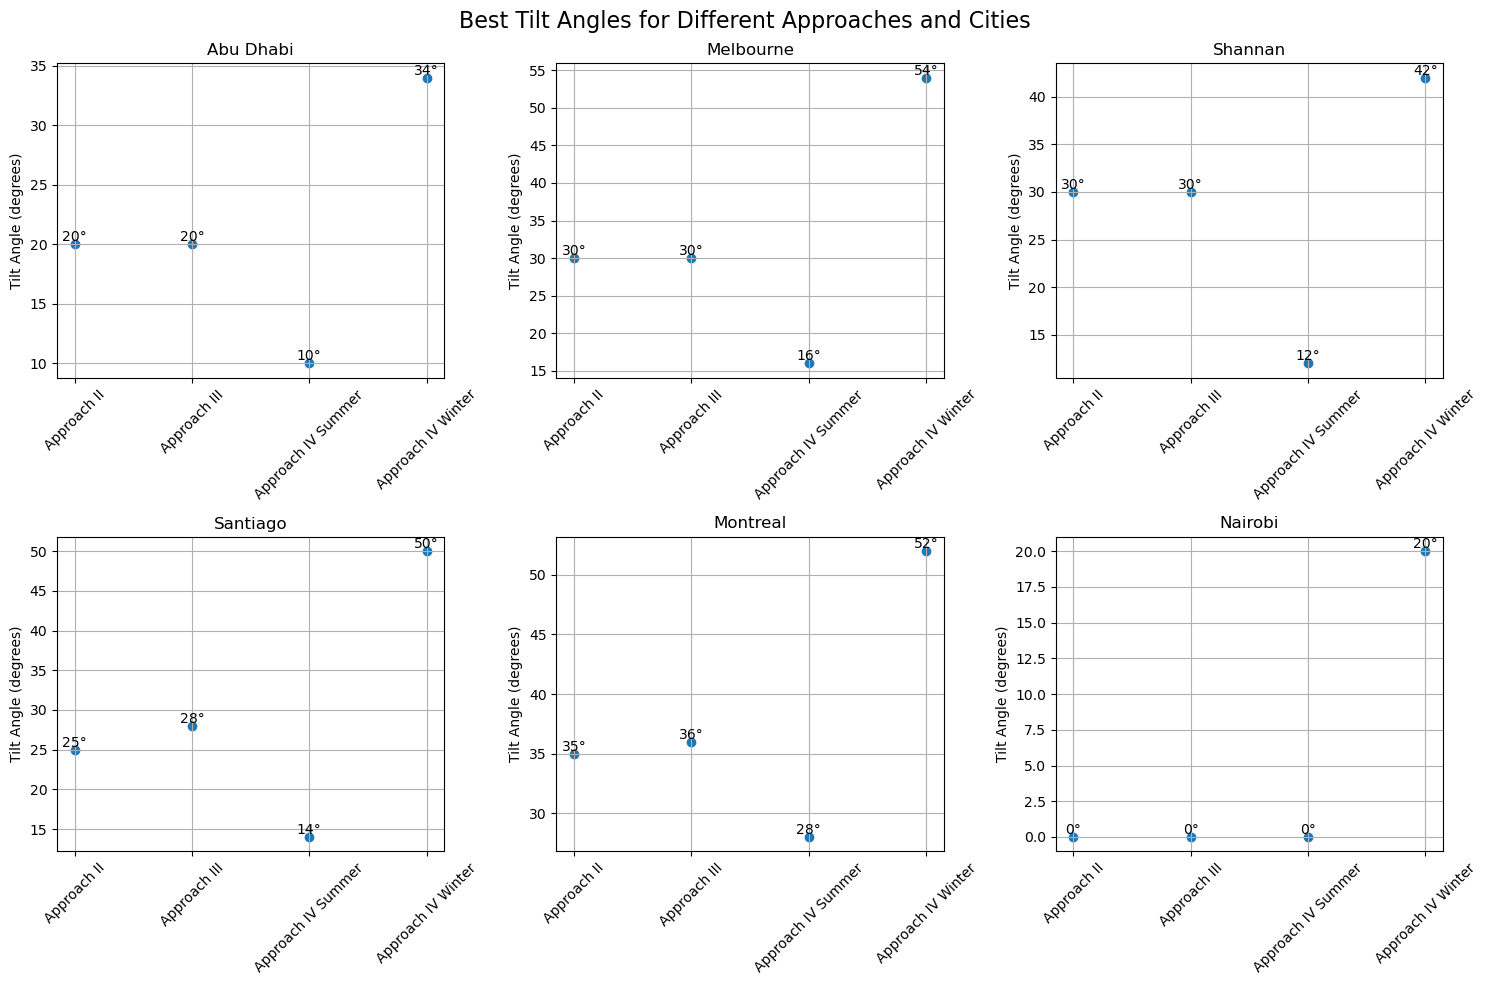

In [117]:
plt.figure(figsize=(15, 10))

for idx, city in enumerate(cities, start=1):
    plt.subplot(2, 3, idx)
    plt.scatter(['Approach II', 'Approach III', 'Approach IV Summer', 'Approach IV Winter'], 
                [best_tilts[idx-1], Best_tilt_DC[idx-1], Best_tilt_summer[idx-1], Best_tilt_winter[idx-1]], 
                label=city)
    for i, tilt in enumerate([best_tilts[idx-1], Best_tilt_DC[idx-1], Best_tilt_summer[idx-1], Best_tilt_winter[idx-1]]):
        plt.text(i, tilt, f'{tilt}°', ha='center', va='bottom')
    plt.title(city)
    #plt.xlabel('Approach')
    plt.ylabel('Tilt Angle (degrees)')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.suptitle('Best Tilt Angles for Different Approaches and Cities', fontsize=16)
plt.tight_layout()
plt.show()


### DC output power with fix and seasonal tilt (Summer week)

In [1]:
## annual best fix tilt
opt_tilt_anl = [20, 30, 30, 28, 36, 0]

## seasonal best tilt
tilt_sum = [10, 16, 12, 14, 28, 0]
tilt_wint = [34, 54, 42, 50, 52, 20]

In [2]:
# power in summer with fix and seasonal tilt angle for the whole year 

Avg_Summer_Power=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x=pd.date_range(start="2007-06-21 00:00", end="2007-06-28 23:00",freq="h")
        Surface_azi=180
        
    else:
        x= pd.date_range(start="2007-11-21 00:00", end="2007-11-28 23:00", freq="h")
        # Extend the date range for November to April
        #x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        #x = x.append(x_extended)
        Surface_azi=0
        
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=192, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)
    
    
####################################################################
# total irradiance based on the annual optimal tilt
    total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=opt_tilt_anl[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad.poa_direct
    diffuse=total_irrad.poa_diffuse
    globalirr=total_irrad.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=opt_tilt_anl[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
#######################################################################
# output dc power for the annual optimal tilt
    dc_power_annual=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.figure(figsize=(14, 4))
    plt.plot(dc_power_annual.index, dc_power_annual, label='Annual Optimal Tilt', linestyle='-', marker='o', color='blue')
    
    
    ####################################################################
# total irradiance based on the summer optimal tilt
    total_irrad_sum = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt_sum[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad_sum.poa_direct
    diffuse=total_irrad_sum.poa_diffuse
    globalirr=total_irrad_sum.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=tilt_sum[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
# output dc power for the summer optimal tilt
    dc_power_summer=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.plot(dc_power_summer.index, dc_power_summer, label='Summer Optimal Tilt', linestyle='-', marker='o', color='orange')
    
    

    plt.title('PV Panel Output Power for Annual and Summer Optimal Tilt')
    plt.xlabel('Time')
    plt.ylabel('DC Power (Watts)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NameError: name 'Cities' is not defined

### DC output power with fix and seasonal tilt (winter week)

In [1]:
# power in winter week with fix and seasonal tilt angle 

Avg_Summer_Power=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x=pd.date_range(start="2007-11-21 00:00", end="2007-11-28 23:00",freq="h")
        Surface_azi=180
        
    else:
        x= pd.date_range(start="2007-06-21 00:00", end="2007-06-28 23:00", freq="h")
        # Extend the date range for November to April
        #x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        #x = x.append(x_extended)
        Surface_azi=0
        
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=192, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)
    
    
####################################################################
# total irradiance based on the annual optimal tilt
    total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=opt_tilt_anl[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad.poa_direct
    diffuse=total_irrad.poa_diffuse
    globalirr=total_irrad.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=opt_tilt_anl[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
#######################################################################
# output dc power for the annual optimal tilt
    dc_power_annual=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.figure(figsize=(14, 8))
    plt.plot(dc_power_annual.index, dc_power_annual, label='Annual Optimal Tilt', linestyle='-', marker='o', color='blue')
    
    
    ####################################################################
# total irradiance based on the winter optimal tilt
    total_irrad_wint = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt_wint[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad_wint.poa_direct
    diffuse=total_irrad_wint.poa_diffuse
    globalirr=total_irrad_wint.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=tilt_wint[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
# output dc power for the summer optimal tilt
    dc_power_summer=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.plot(dc_power_summer.index, dc_power_summer, label='Summer Optimal Tilt', linestyle='-', marker='o', color='orange')
    plt.title('PV Panel Output Power for Annual and Summer Optimal Tilt')
    plt.xlabel('Time')
    plt.ylabel('DC Power (Watts)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



NameError: name 'Cities' is not defined

In [2]:
# power in winter week with fix and seasonal tilt angle 

Avg_Summer_Power=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x=pd.date_range(start="2007-11-21 00:00", end="2007-11-28 23:00",freq="h")
        Surface_azi=180
        
    else:
        x= pd.date_range(start="2007-06-21 00:00", end="2007-06-28 23:00", freq="h")
        # Extend the date range for November to April
        #x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        #x = x.append(x_extended)
        Surface_azi=0
        
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=192, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)
    
    
####################################################################
# total irradiance based on the annual optimal tilt
    total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=opt_tilt_anl[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad.poa_direct
    diffuse=total_irrad.poa_diffuse
    globalirr=total_irrad.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=opt_tilt_anl[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
#######################################################################
# output dc power for the annual optimal tilt
    dc_power_annual=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.figure(figsize=(14, 4))
    plt.plot(dc_power_annual.index, dc_power_annual, label='Annual Optimal Tilt', linestyle='-', marker='o', color='blue')
    
    
    ####################################################################
# total irradiance based on the winter optimal tilt
    total_irrad_wint = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt_wint[i],
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad_wint.poa_direct
    diffuse=total_irrad_wint.poa_diffuse
    globalirr=total_irrad_wint.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=tilt_wint[i], surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    
# output dc power for the summer optimal tilt
    dc_power_summer=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(dc_power)
    plt.plot(dc_power_summer.index, dc_power_summer, label='winter Optimal Tilt', linestyle='-', marker='o', color='black')
    plt.title('PV Panel Output Power for Annual and winter Optimal Tilt')
    plt.xlabel('Time')
    plt.ylabel('DC Power (Watts)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

NameError: name 'Cities' is not defined